## Неделя 1. Пятница 

### Математика. Градиентный спуск

In [971]:
# Имортируй библиотеки
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 100
import numpy as np
from matplotlib import cm

### Анализ

❓Что значит, что производная в точке равна нулю? 

> ответ тут

Найдите производную функций ниже

1. $y = \dfrac{3x^7}{7}$

$y' = 3x^6$

2. $y = -7$

$y' = 0$

3. $y = \dfrac{9}{x}$

$y' = -\dfrac{9}{x^2}$

4. $y = 11 - 6x$

$y' = -6$

5. $y = 8\sqrt{x} + 7\sin{x}$

$y' = \dfrac{4}{\sqrt{x}} + 7\cos{x}$

6. $y = \dfrac{\sin{x}}{5x}$

$y' = \dfrac{\cos{x}}{5x}-\dfrac{\sin{x}}{5x^2}$

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks in progress"`
4. Выполни команду `git push`

### Градиентный спуск

### 📚 **Теоретическое введение:**
 
* В машинном и глубоком обучении градиентный спуск используется для минимизации функции потерь (loss function), которая показывает насколько модель ошибается в своих предсказаниях. 

* Для простоты концепции, мы попробуем минимизировать абстрактные функции, однако именно так и работает большинство моделей и все нейронные сети

#### 1. Градиентный спуск функции одного переменного

1. Задай функцию `loss`: она будет возвращать значение функции в точке. Для начала можно использовать простую функцию, например: 
$$L(\omega) = \omega^2 + 3$$

In [972]:
def loss(w):
    loss = w**2 + 3
    return loss

2. Задай функцию `derivative` - она будет возвращать значение производной функции `loss` в точке. 

In [973]:
def derivative(w):
    deriv = 2 * w
    return deriv

3. Задай функцию `step` - она будет возвращать новое значение весов по формуле:
$$w_{i+1} = w_i - \lambda \cdot \frac{\partial f(w)}{\partial w_i}$$

Входные аргументы: `w` - текущее значение параметра, `lambda` – скорость спуска. 

In [974]:
def step(w, _lambda):
    """
    input:
        _lambda - learning rate

    returns:
        coord - w_coord
        loss_value  - y_coord
    """
    coord = w - _lambda * derivative(w)
    loss_value = loss(coord)

    return coord, loss_value

4. Задай функцию `get_minima`, которая будет возвращать список, содержащий все значения параметра `w`, и список `loss_values`, который будет содержать значения функции `loss` для соответствующего параметра `w`. На вход функции поступает `w_0` – начальное значение параметра, `eps` – критерий останова. `lambda` - скорость спуска, которая будет передаваться в функцию `step`

In [975]:
def get_minima(w_0, eps, _lambda):
    w = []
    loss_values = []
    w_curr = w_0
    w.append(w_curr)
    loss_values.append(loss(w_curr))
    w_curr, L_curr = step(w_curr, _lambda)
    w.append(w_curr)
    loss_values.append(L_curr)
    while loss_values[-2] - loss_values[-1] > eps:
        w_curr, L_curr = step(w_curr, _lambda)
        w.append(w_curr)
        loss_values.append(L_curr)
    return w, loss_values


res = get_minima(-5, 0.000001, 0.01)
print(res[1][-1])

3.000023934696989


Нарисуй график функции `loss`. По координатам, возвращенным функцией `get_minima` нарисуй график движения градиентного спуска. 

''

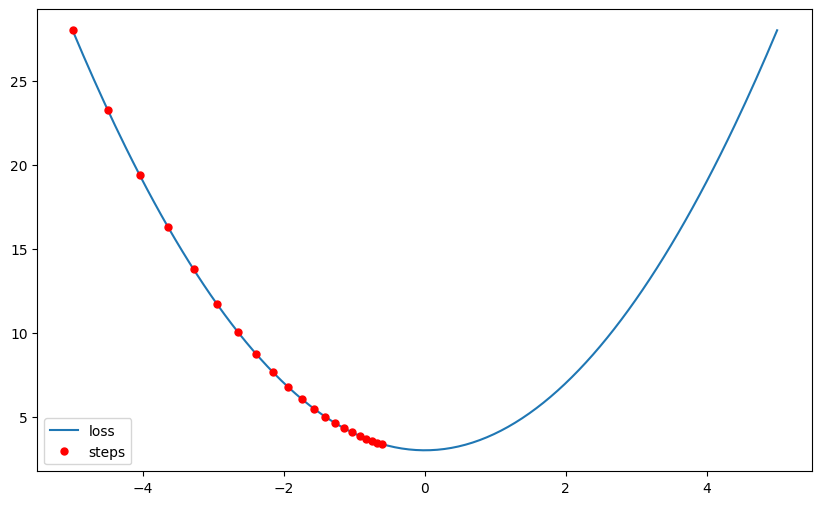

In [976]:
x = np.linspace(-5, 5, 200)
steps = get_minima(-5, 0.1, 0.05)
plt.style.use('default')
plt.figure(figsize=(10,6))
plt.plot(x, loss(x), label='loss')
plt.plot(steps[0], steps[1], marker='o', linewidth=0, markersize=5, color='red', label = 'steps')
plt.legend()
;

Нарисуй несколько графиков, соответствующих разным коэффициентам $\lambda$. 

''

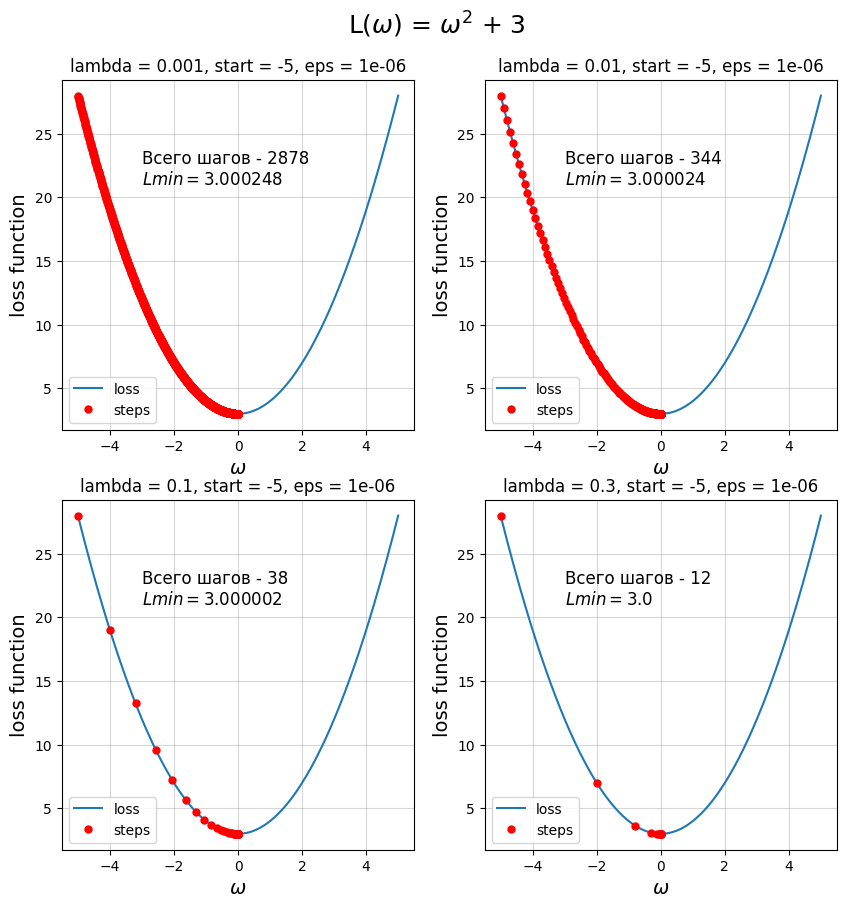

In [977]:
lambdas = [0.001, 0.01, 0.1, 0.3]
places = [[0, 0], [0, 1], [1, 0], [1, 1]]
start = -5
eps = 0.000001
steps_vs_lambda = [get_minima(start, eps, lambdas[i]) for i in range(4)]
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
# ax[*places[0]].plot(x, loss(x), label="loss")
for i in range(4):
    ax[*places[i]].plot(x, loss(x), label="loss")
    ax[*places[i]].plot(
        steps_vs_lambda[i][0],
        steps_vs_lambda[i][1],
        marker="o",
        linewidth=0,
        markersize=5,
        color="red",
        label="steps",
    )
    ax[*places[i]].set_title(f'lambda = {lambdas[i]}, start = {start}, eps = {eps}')
    ax[*places[i]].legend()
    ax[*places[i]].grid(True, alpha=0.5)
    ax[*places[i]].text(-3, 21, f'Всего шагов - {len(steps_vs_lambda[i][0])}\n$Lmin = ${round(steps_vs_lambda[i][1][-1], 6)}', fontsize=12)
    ax[*places[i]].set_xlabel('$\\omega$', fontsize=14)
    ax[*places[i]].set_ylabel('loss function', fontsize=14)
plt.suptitle('L($\\omega$) = $\\omega^2$ + 3', fontsize=18, y=0.95)
plt.savefig('./figures/grad_func1.png')
;

❓ Как выбрать оптимальную скорость обучения?

> ???

❓Будет ли зависеть скорость работы всей процедуры от начального выбора значения искомого параметра?

> Да

Поэкспериментируй с результатом, задай функцию: 
$$L(\omega) = \omega^2 - \omega$$

In [978]:
def loss2(w):
    loss = w**2 - w
    return loss

In [979]:
def derivative2(w):
    deriv = 2 * w - 1
    return deriv

In [980]:
def step2(w, _lambda):
    """
    input:
        _lambda - learning rate

    returns:
        coord - w_coord
        loss_value  - y_coord
    """
    coord = w - _lambda * derivative2(w)
    loss_value = loss2(coord)

    return coord, loss_value

In [981]:
def get_minima2(w_0, eps, _lambda):
    w = []
    loss_values = []
    w_curr = w_0
    w.append(w_curr)
    loss_values.append(loss2(w_curr))
    w_curr, L_curr = step2(w_curr, _lambda)
    w.append(w_curr)
    loss_values.append(L_curr)
    while loss_values[-2] - loss_values[-1] > eps:
        w_curr, L_curr = step2(w_curr, _lambda)
        w.append(w_curr)
        loss_values.append(L_curr)
    return w, loss_values


get_minima2(-5, 1, 0.05)

([-5,
  -4.45,
  -3.955,
  -3.5095,
  -3.10855,
  -2.747695,
  -2.4229255000000003,
  -2.1306329500000003,
  -1.8675696550000003,
  -1.6308126895000001,
  -1.41773142055],
 [30,
  24.2525,
  19.597025000000002,
  15.82609025,
  12.771633102500001,
  10.297522813025001,
  8.293493478550252,
  6.670229717625704,
  5.35538607127682,
  4.290362717734224,
  3.427693801364721])

''

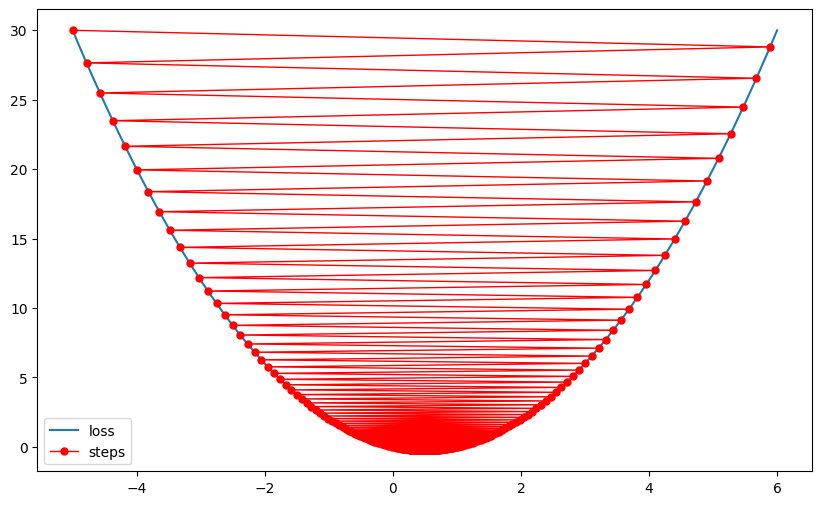

In [1002]:
x2 = np.linspace(-5, 6, 200)
steps2 = get_minima2(-5, 1e-6, 0.99)
plt.style.use('default')
plt.figure(figsize=(10,6))
plt.plot(x2, loss2(x2), label='loss')
plt.plot(steps2[0], steps2[1], marker='o', linewidth=1, markersize=5, color='red', label = 'steps')
plt.legend()
;

In [983]:
np.min(np.apply_along_axis(lambda x: loss2(x), axis=0, arr=x2))

np.float64(-0.2492361304007475)

Нарисуй несколько графиков, соответствующих разным коэффициентам $\lambda$. 

''

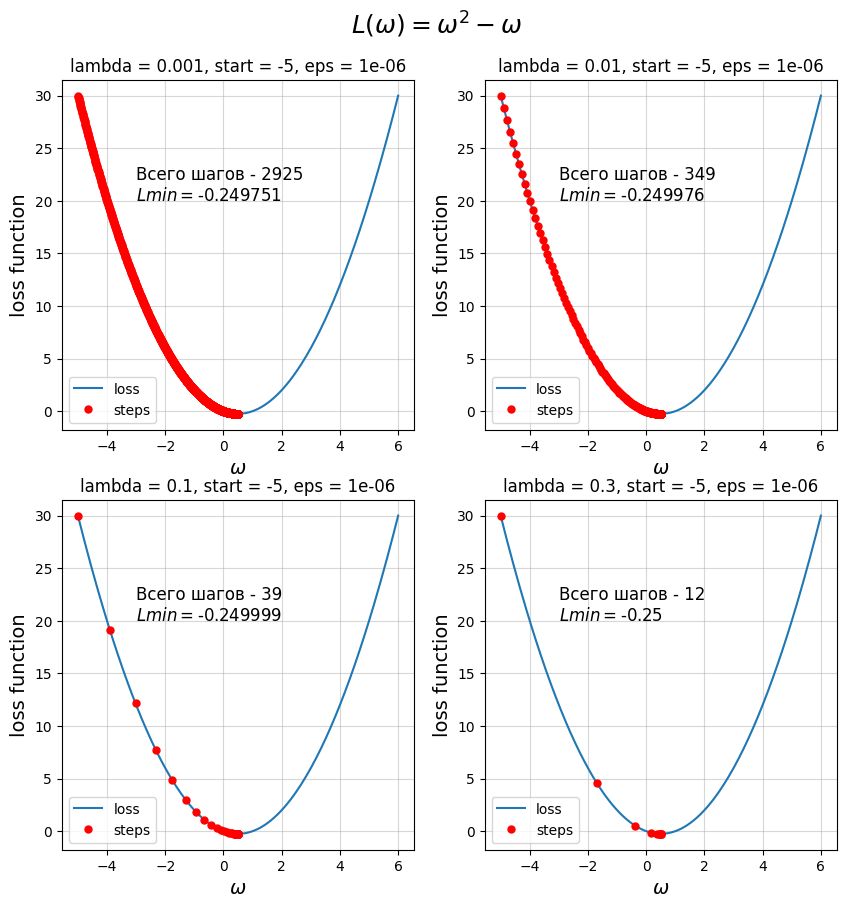

In [984]:
lambdas2 = [0.001, 0.01, 0.1, 0.3]
places2 = [[0, 0], [0, 1], [1, 0], [1, 1]]
start2 = -5
eps2 = 1e-6
steps_vs_lambda2 = [get_minima2(start2, eps2, lambdas2[i]) for i in range(4)]
fig2, ax2 = plt.subplots(2, 2, figsize=(10, 10))
# ax[*places[0]].plot(x, loss(x), label="loss")
for i in range(4):
    ax2[*places2[i]].plot(x2, loss2(x2), label="loss")
    ax2[*places2[i]].plot(
        steps_vs_lambda2[i][0],
        steps_vs_lambda2[i][1],
        marker="o",
        linewidth=0,
        markersize=5,
        color="red",
        label="steps",
    )
    ax2[*places2[i]].set_title(f'lambda = {lambdas2[i]}, start = {start2}, eps = {eps2}')
    ax2[*places2[i]].legend()
    ax2[*places2[i]].grid(True, alpha=0.5)
    ax2[*places2[i]].text(-3, 20, f'Всего шагов - {len(steps_vs_lambda2[i][0])}\n$Lmin = ${round(steps_vs_lambda2[i][1][-1], 6)}', fontsize=12)
    ax2[*places2[i]].set_xlabel('$\\omega$', fontsize=14)
    ax2[*places2[i]].set_ylabel('loss function', fontsize=14)

plt.suptitle('$L(\\omega) = \\omega^2 - \\omega$', fontsize=18, y=0.95)
plt.savefig('./figures/grad_func2.png')
;

#### 2. Градиентный спуск для функции двух переменных

1. Модифицируй функции из предыдущего задания и реализуй поиск минимума функции двух переменных. 
Функция для минимизации: 
$$\mathcal{L} (\omega_1, \omega_2) = \omega_1^2 + 2\omega_2^2 - 3\omega_1 - 4\omega_2$$

В конце визуализируй результат аналогично предыдущему заданию.


__P.S__: для данной функции, минимальное значение достигается в точке $(\dfrac{3}{2}; 1)$. Это необходимо для самопроверки

In [985]:
def loss3(w):
    loss = w[0] ** 2 + 2 * w[1] ** 2 - 3 * w[0] - 4 * w[1]
    return loss

In [986]:
def derivative3(w):
    deriv = np.array([2 * w[0] - 3, 4 * w[1] - 4])
    return deriv

In [987]:
def step3(w, _lambda):
    """
    input:
        alpha - learning rate

    returns:
        coord - [w1_coords, w2_coords]
        loss_value - y_coord
    """
    coord = w - _lambda * derivative3(w)
    loss_value = loss3(coord)

    return coord, loss_value

In [988]:
step3([-4, 2], 0.1)

(array([-2.9,  1.6]), np.float64(15.83))

In [989]:
def get_minima3(w_0, eps, _lambda):
    w = []
    loss_values = []
    w_curr = np.array(w_0)
    w.append(w_curr)
    loss_values.append(loss3(w_curr))
    w_curr, L_curr = step3(w_curr, _lambda)
    w.append(w_curr)
    loss_values.append(L_curr)
    while loss_values[-2] - loss_values[-1] > eps:
        w_curr, L_curr = step3(w_curr, _lambda)
        w.append(w_curr)
        loss_values.append(L_curr)
    return np.array(w), loss_values


x3, loss_values3 = get_minima3([40, 40], 0.00001, 0.1)
x3

array([[40.        , 40.        ],
       [32.3       , 24.4       ],
       [26.14      , 15.04      ],
       [21.212     ,  9.424     ],
       [17.2696    ,  6.0544    ],
       [14.11568   ,  4.03264   ],
       [11.592544  ,  2.819584  ],
       [ 9.5740352 ,  2.0917504 ],
       [ 7.95922816,  1.65505024],
       [ 6.66738253,  1.39303014],
       [ 5.63390602,  1.23581809],
       [ 4.80712482,  1.14149085],
       [ 4.14569985,  1.08489451],
       [ 3.61655988,  1.05093671],
       [ 3.19324791,  1.03056202],
       [ 2.85459833,  1.01833721],
       [ 2.58367866,  1.01100233],
       [ 2.36694293,  1.0066014 ],
       [ 2.19355434,  1.00396084],
       [ 2.05484347,  1.0023765 ],
       [ 1.94387478,  1.0014259 ],
       [ 1.85509982,  1.00085554],
       [ 1.78407986,  1.00051332],
       [ 1.72726389,  1.00030799],
       [ 1.68181111,  1.0001848 ],
       [ 1.64544889,  1.00011088],
       [ 1.61635911,  1.00006653],
       [ 1.59308729,  1.00003992],
       [ 1.57446983,

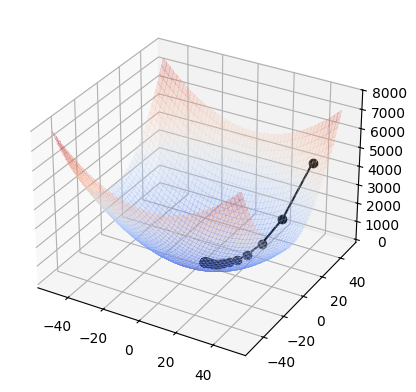

In [990]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
# X = x[:, 0]
# Y = x[:, 1]

X = np.arange(-50, 50, 0.2)
Y = np.arange(-50, 50, 0.2)
X, Y = np.meshgrid(X, Y)

Z = loss3([X, Y])

# Plot the surface.
surf = ax.plot_surface(
    X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.2
)


ax.plot(x3[:, 0], x3[:, 1], loss_values3, color="k", marker="o")


plt.show()

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks done"`
4. Выполни команду `git push`

#### 3. Дополнительное задание. 

#### Адаптивная скорость обучения

Модифицируй одну из предыдущих реализаций, добавив [адаптивный подбор скорости обучения](https://en.wikipedia.org/wiki/Learning_rate) (time-based, step-based, exponential)

In [991]:
# code

#### Решение системы линейных уравнений с помощью градиентного спуска


Реализуй класс `Solver` для вычисления решения системы линейных уравнений произвольного размера.  

Логика работы класса должна быть следующей: 

```python

solver = Solver(X, y)
solver.fit(learning_rate=0.01, n_iter=10)
print(solver.mse())
>>> Mean squared error: 0.00313
print(solver.coef_)
>>> [.5, 1, -2]

```

`X` – матрица системы

`y` – вектор ответов

`learning_rate` – шаг градинтного спуска

`n_iter` - число итераций. 

Метод `mse` вычисляет среднеквадратическую ошибку: `sum((y - X@w)**2) / len(w)`, где `w` - искомый вектор коэффициентов. 

Попробуй решить с помощью реализованного класса систему уравнений:
$$
\begin{cases}
2w_1 + 3w_2 - w_3 = 9 \\
w_1 -2w_2 + w_3 = 3 \\
w_1 + 2w_3 = 2
\end{cases}
$$

Решение уравнения выше – 4, 0, -1. Значения, которые ты получишь в процессе оптимизации могут незначительно отличаться. 


In [992]:
X = np.array([[2, 3, -1], [1, -2, 1], [1, 0, 2]])

y = np.array([9, 3, 2])

In [998]:
class Solver:

    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.alpha = 0.01
        self.n = 10
        return None

    def fit(self, learning_rate, n_iter):
        self.alpha = learning_rate
        self.n = n_iter
        return None

    def loss(self, w):
        loss = sum((self.y - self.X @ w) ** 2) / len(w)
        return loss

    def grad(self, w):
        grad = X.T @ (X @ w - y)
        return grad

    def step(self, w, _lambda):
        coord = w - _lambda * self.grad(w)
        loss_value = self.loss(coord)
        return coord, loss_value

    def get_min(self, w_0, _lambda):
        w = []
        loss_values = []
        w_curr = w_0
        w.append(w_curr)
        loss_values.append(self.loss(w_curr))
        for _ in range(self.n):
            w_curr, L_curr = self.step(w_curr, _lambda)
            w.append(w_curr)
            loss_values.append(L_curr)
        return np.array(w)[-1], loss_values[-1]

    def mse(self):
        w_0 = np.zeros(len(self.X[0]))
        return self.get_min(w_0, self.alpha)[1]

    def solution(self):
        w_0 = np.zeros(len(self.X[0]))
        return np.apply_along_axis(
            lambda x: np.round(x, 5), axis=0, arr=self.get_min(w_0, self.alpha)[0]
        )

In [999]:
solver = Solver(X, y)
solver.fit(0.1, 100)
print(solver.mse())
print(solver.solution())

7.910703008078834e-14
[ 4.  0. -1.]


#### Реализация класса оптимизатора

Реализуй класс, который `Optimizer`, который будет решать задачу минимизации функции, сохранения истории процедуры, визуализации и возможностью выбирать один из типов управления скоростью обучения. Добавь возможность задания параметра для реализации остановки. 

In [ ]:
class Optimizer:
    def __init__(self):
    

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks completed"`
4. Выполни команду `git push`